In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
%matplotlib inline

In [2]:
def objective(w_pdfs):
    return np.log(w_pdfs.sum(axis = 1)).sum()

def GMM(X, K, epsilon = 1e-10, max_iters = 30, conv = 1e-8, show_curve = False):
    N, D = X.shape
    R = np.zeros((N,K))
    M = X[np.random.permutation(N),:][:K]
    SIGMA = np.zeros((K,D,D))
    pi = np.ones(K)/K
    w_pdfs = np.zeros((N,K))
    
    for k in range(K):
        SIGMA[k] = np.identity(D)
        
    J = []
    
    for t in range(max_iters):
        for k in range (K):
            w_pdfs[:,k] = pi[k]*multivariate_normal.pdf(X,M[k], SIGMA[k])
            
        R = w_pdfs/w_pdfs.sum(axis = 1, keepdims = True)
        
        for k in range(K):
            Nk = R[:,k].sum()
            pi[k] = Nk/N
            M[k] = R[:,k].dot(X)/Nk
            devs = X- M[k]
            Rdevs = np.expand_dims(R[:, k], -1)*devs
            SIGMA [k] = Rdevs.T.dot(devs)/Nk+ epsilon*np.identity(D)
            
        J.append(objective(w_pdfs))
        
        if t>0:
            if np.abs(J[t] - J[t-1])<conv:
                break
                
    if show_curve:
        plt.figure()
        plt.plot(J)
        plt.show()
        plot_clusters(X,R,M)
        
    return R,M,SIGMA, pi


def plot_clusters(X,R,M):
    K = R.shape[1]
    
    Rcolors = np.random.rand(K,3)
    colors = R.dot(Rcolors)
    
    print("Centers are",M)
    
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c = colors,alpha = .5)
    plt.scatter(M[0,0],M[0,1],c='r')
    plt.scatter(M[1,0],M[1,1],c='r')
    plt.scatter(M[2,0],M[2,1],c='r')
    plt.show()
    
    
    


In [3]:
N = 2000
D = 2
k = 3

X = np.zeros((N,D))
X[:1200, :] = np.random.randn(1200,D)*2
X[1200:1800,:] = np.random.randn(600,D)+np.array ([4,4])*1.5
X[1800:2000,:] = np.random.randn(200,D)+np.array ([0,4])*2



In [4]:
def main():
    N = 2000
    D = 2
    
    X = np.zeros((N,D))
    X[:1200, :] = np.random.randn(1200,D)*2
    X[1200:1800,:] = np.random.randn(600,D)+np.array ([4,4])*1.5
    X[1800:2000,:] = np.random.randn(200,D)+np.array ([0,4])*2
    
    plt.figure()
    plt.scatter(X[:,0], X[:,1], alpha = .5)
    
    
    R,M,SIGMA,pi = GMM(X,3, show_curve = True)
   
 

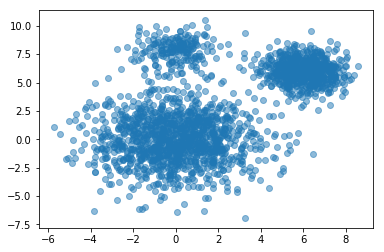

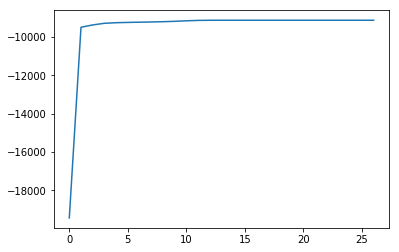

Centers are [[ 6.01052405e+00  6.03976032e+00]
 [ 3.89943052e-03  7.89066226e+00]
 [ 4.68374844e-03 -3.84302562e-02]]


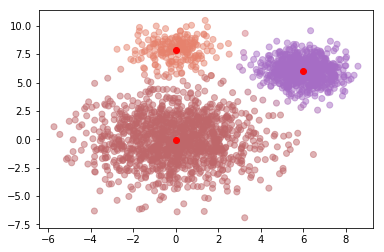

In [5]:
if __name__ =="__main__":
        main()